<a href="https://colab.research.google.com/github/Bino-01/Air-Line-Passengers/blob/master/CO2_ARIMA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Importing Main Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [18]:
# TReading the Dataset
air = pd.read_csv('/content/co2.csv')
air

,0
0,315.58
1,316.39
2,316.79
3,317.82
4,318.39
...,...
343,347.54
344,346.20
345,346.20
346,347.44


In [19]:
# Renainming Columns
air.columns = ['CO2']
air

,CO2
0,315.58
1,316.39
2,316.79
3,317.82
4,318.39
...,...
343,347.54
344,346.20
345,346.20
346,347.44


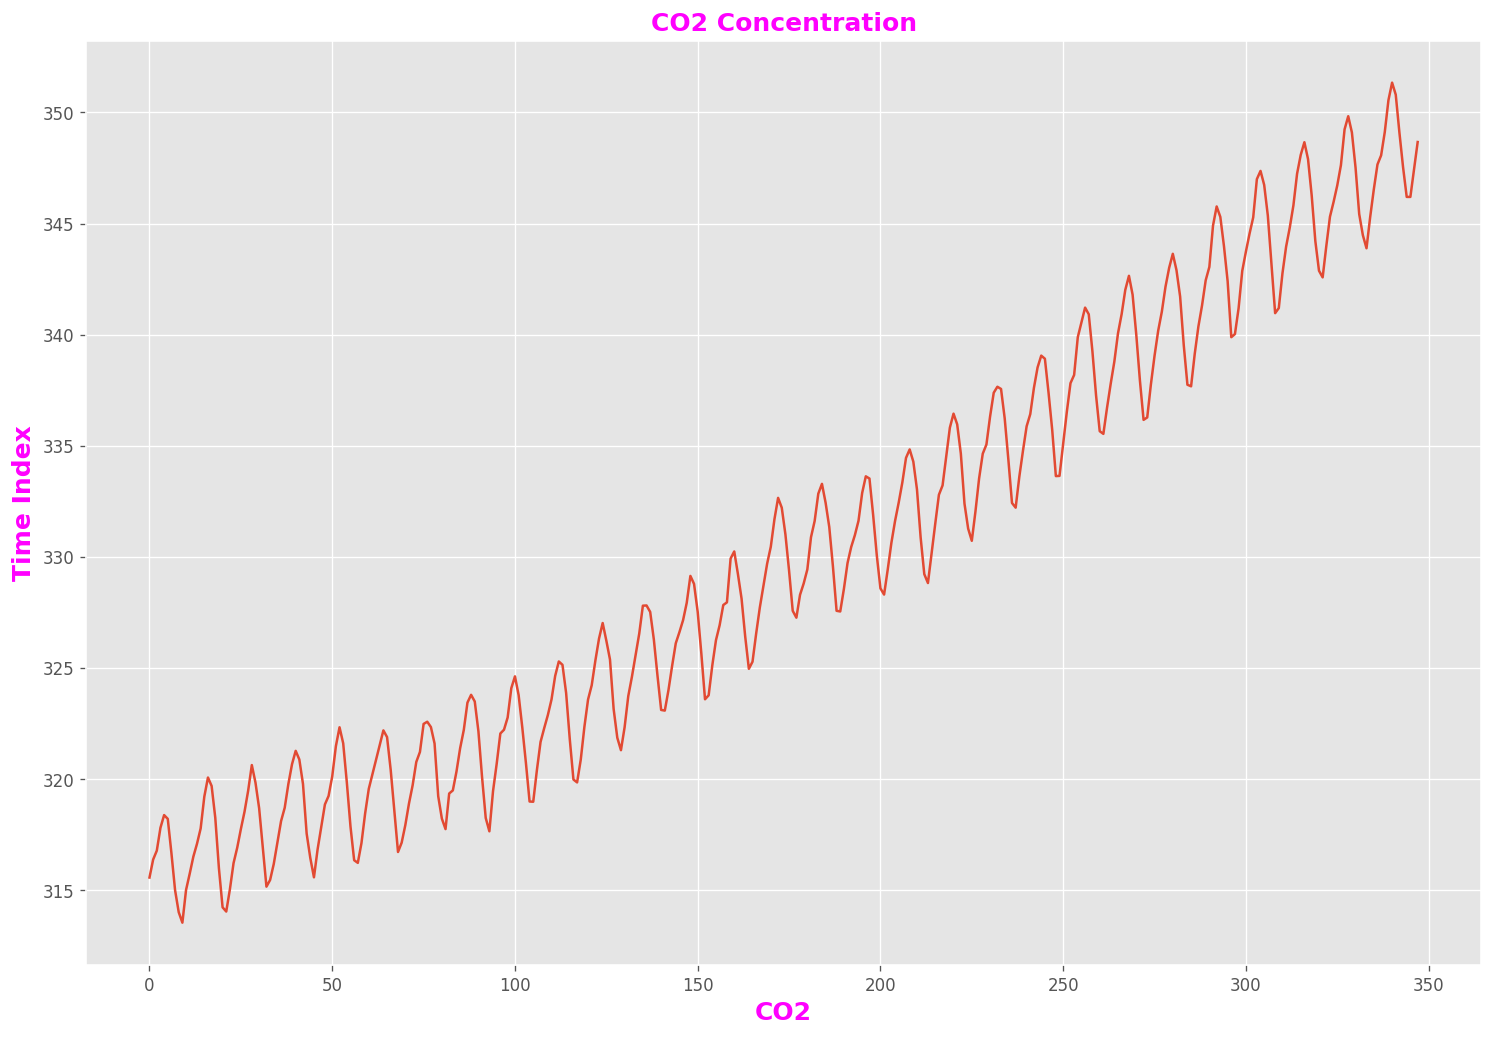

In [20]:
# Plotting the TS
plt.style.available
plt.style.use('ggplot')
plt.figure(figsize = (15,10), dpi = 120)
plt.xlabel('CO2', color = 'magenta', fontdict = {'fontweight':'bold', 'fontstyle':'normal', 'fontsize':15})
plt.ylabel('Time Index', color = 'magenta', fontdict = {'fontweight':'bold', 'fontstyle':'normal', 'fontsize':15})
plt.title('CO2 Concentration', color = 'magenta', fontdict = {'fontweight':'bold', 'fontstyle':'normal', 'fontsize':15})

plt.plot(air['CO2'])
plt.show()


In [21]:
# Running Test
from statsmodels.tsa.stattools import adfuller,kpss
adf_test = adfuller(air['CO2'])
print ('ADF Test: p-value = %f' %adf_test[1]) # ADF_test p-value > 0.05 TS is non-stationary

kpss_test = kpss(air['CO2'])
print ('KPSS Test: p-value = %f' %kpss_test[1])  # KPSS_test p-value > 0.05 TS is non-stationary


ADF Test: p-value = 1.000000
KPSS Test: p-value = 0.010000


<Figure size 1800x1200 with 0 Axes>

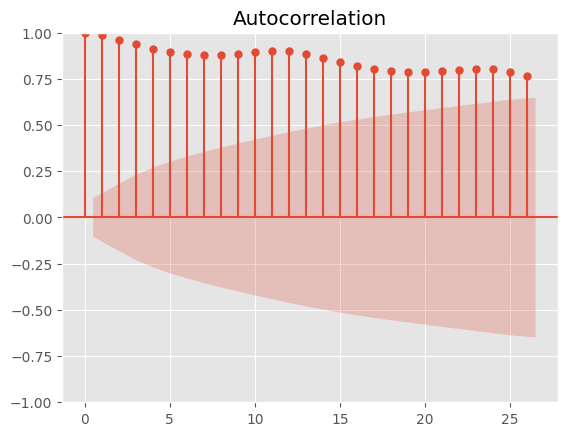

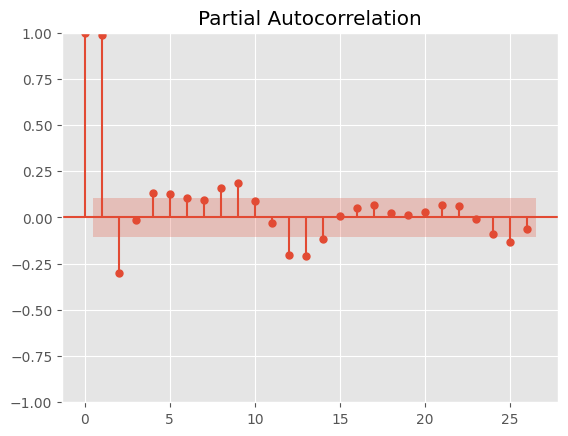

In [22]:
# Plotting the ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize = (15,10), dpi = 120)
plot_acf(air['CO2'])
plot_pacf(air['CO2'])
plt.show()

<Figure size 1800x1200 with 0 Axes>

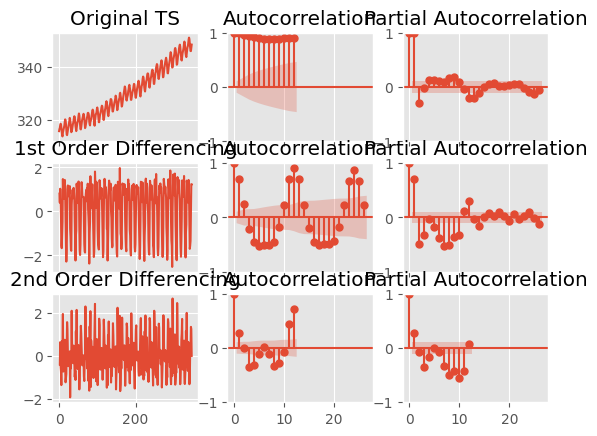

In [23]:
from matplotlib import axes
# Determination of values of d

# Original TS
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize = (15,10), dpi = 120)
fig, axes = plt.subplots(3, 3, sharex = 'col')
axes[0, 0].plot(air['CO2']); axes[0,0].set_title('Original TS')
plot_acf(air['CO2'], lags = 12, ax = axes[0, 1]); plot_pacf(air['CO2'], ax = axes[0, 2])

# Plotting 1st Order Differencing
axes[1, 0].plot(air['CO2'].diff()); axes[1,0].set_title('1st Order Differencing')
plot_acf(air['CO2'].diff().dropna(), ax = axes[1, 1]); plot_pacf(air['CO2'].diff().dropna(), ax = axes[1, 2])

# Plotting 2nd Order Differencing
axes[2, 0].plot(air['CO2'].diff().diff()); axes[2,0].set_title('2nd Order Differencing')
plot_acf(air['CO2'].diff().diff().dropna(), lags = 12, ax = axes[2, 1]); plot_pacf(air['CO2'].diff().diff().dropna(), lags = 12, ax = axes[2, 2])

plt.show()

In [24]:
# Selecting AriMAs
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(air['CO2'], order = (0,1,1))
model_fit = model.fit()
print(model_fit.summary())
"""
AIC: The Akaike Information Criterion.
BIC: The Bayesian Information Criterion.
ARIMA(1,1,1)
HQIC: The Hannan Quinn Information Criteria is Good to make a good selection between competing ARIMA models by balancing goodness of fit with complexity.
"""

                               SARIMAX Results                                
Dep. Variable:                    CO2   No. Observations:                  348
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -442.920
Date:                Fri, 09 Jan 2026   AIC                            889.839
Time:                        11:35:15   BIC                            897.538
Sample:                             0   HQIC                           892.905
                                - 348                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6562      0.044     14.864      0.000       0.570       0.743
sigma2         0.7508      0.075      9.981      0.000       0.603       0.898
Ljung-Box (L1) (Q):                  30.35   Jarque-

In [25]:
# Generating 2nd ARIMA model

model = ARIMA(air['CO2'], order = (0,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    CO2   No. Observations:                  348
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -546.622
Date:                Fri, 09 Jan 2026   AIC                           1095.244
Time:                        11:35:15   BIC                           1099.094
Sample:                             0   HQIC                          1096.777
                                - 348                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.3671      0.163      8.401      0.000       1.048       1.686
Ljung-Box (L1) (Q):                 173.03   Jarque-Bera (JB):                35.77
Prob(Q):                              0.00   Pr